# Task 4: Predicting Insurance Claim Amounts

---

### 👨‍💻 **Author: Abdul Samad**

- 🔗 **LinkedIn:**  
  [https://www.linkedin.com/in/abdulsamad577/](https://www.linkedin.com/in/abdulsamad577/)

- 🧠 **Kaggle Profile:**  
  [https://www.kaggle.com/samad0015](https://www.kaggle.com/samad0015)

- 💻 **GitHub Repository:**  
  [https://github.com/abdulsamad577/Internship_tasks](https://github.com/abdulsamad577/Internship_tasks)

---


## 1. Introduction:
In this task, we will explore a dataset obtained from [Kaggle - datasets/mragpavank/insurance1](https://www.kaggle.com/datasets/mragpavank/insurance1), which contains personal and health-related information such as age, sex, BMI, number of children, smoking habits, region, and insurance charges.

Each row in the dataset represents a person's demographic and health profile. The **goal is to predict the `charges` column**, which indicates the medical insurance claim amount billed to the individual. This dataset helps us understand how lifestyle and demographic factors affect insurance costs.

### 📦 Dataset Shape:
- **Rows (Samples):** 1,338
- **Columns (Features):** 7

### 🎯 Objective:
The main objective of this task is to build a regression model that can accurately **predict the medical insurance charges (`charges` column)** based on the following features:
- `age`
- `sex`
- `bmi`
- `children`
- `smoker`
- `region`

The target variable for prediction is:
- ✅ **`charges`** (Medical insurance claim amount)

By modeling this relationship, we aim to help insurance companies make informed pricing decisions and evaluate health risks more effectively.


## 2. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


## 3. Load and Explore the Dataset

#### Load the dataset


In [2]:
import kagglehub
import os 
# Download latest version
path = kagglehub.dataset_download("mragpavank/insurance1")
print("Path to dataset files:", path)
file=os.listdir(path)
print(file)
file=file[0]

Path to dataset files: C:\Users\Sami\.cache\kagglehub\datasets\mragpavank\insurance1\versions\1
['insurance.csv']


In [3]:
df=pd.read_csv(os.path.join(path,file))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

> There are 1338 rows and 7 columns in the dataset. The columns include demographic and health-related information

In [5]:
print("The names of the Columns are:",df.columns)

The names of the Columns are: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 📊 Data Quality Overview

- **Missing Values:** The dataset contains **no missing values**, which ensures data completeness and eliminates the need for imputation.
- **Feature Types:** It includes a mix of **numerical** (e.g., `age`, `bmi`, `children`) and **categorical** (e.g., `sex`, `smoker`, `region`) features.
- This diverse feature set is well-suited for developing a **regression model** to predict insurance charges.


## 4. Exploratory Data Analysis (EDA)

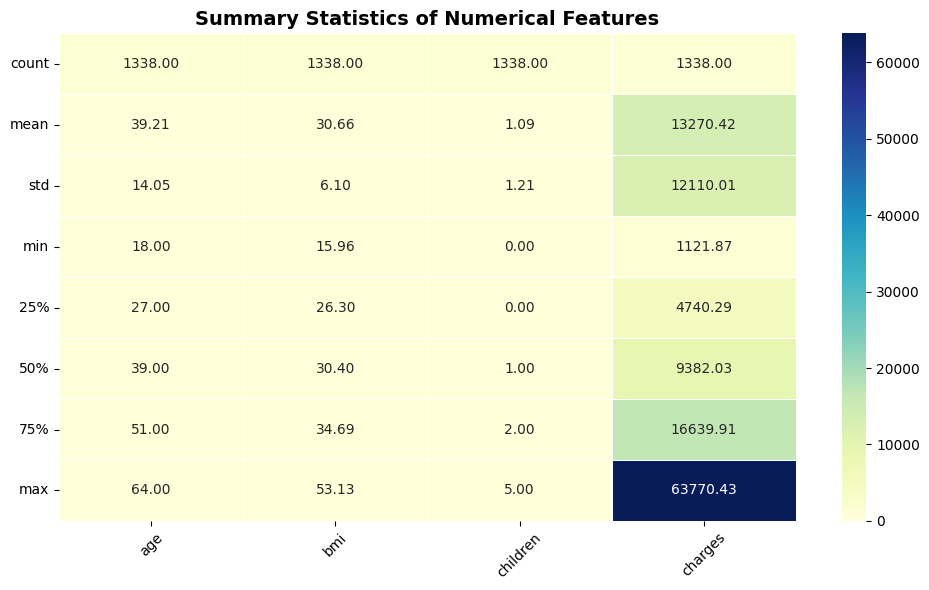

In [8]:
# Display summary statistics
desc = df.describe()

# Set a visual style
plt.figure(figsize=(10, 6))
sns.heatmap(desc, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

plt.title('Summary Statistics of Numerical Features', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### Distribution Plots of Numerical Features

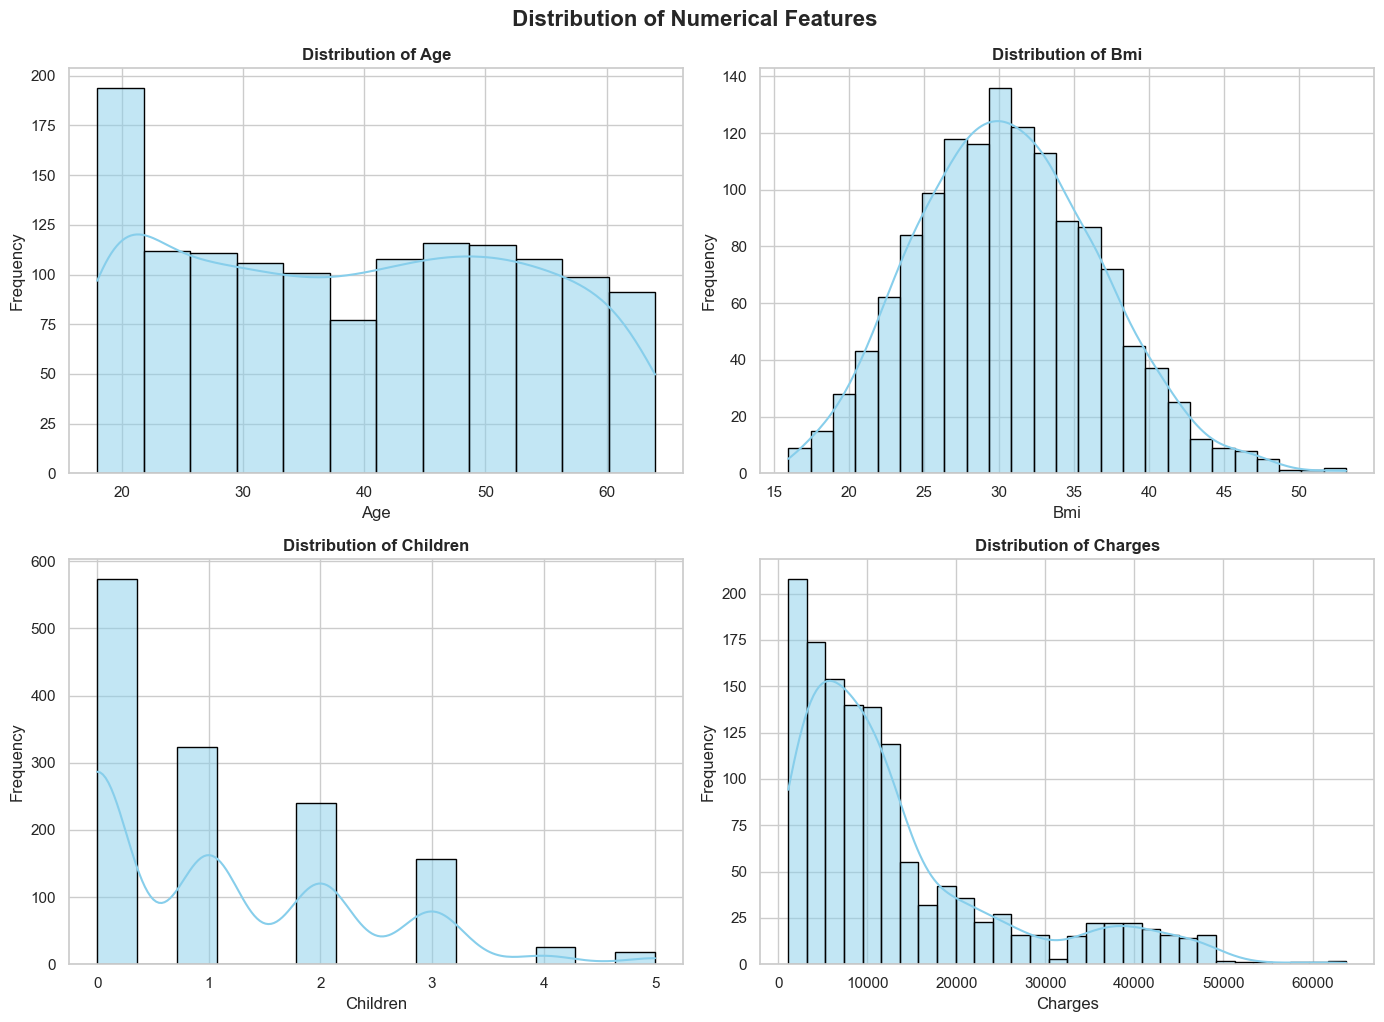

In [9]:
# Set the style
sns.set(style="whitegrid")

# Define the numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']

# Create subplots
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col.capitalize()}', fontsize=12, weight='bold')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle(' Distribution of Numerical Features', fontsize=16, weight='bold', y=1.02)
plt.show()


#### Plot of BMI vs Charges

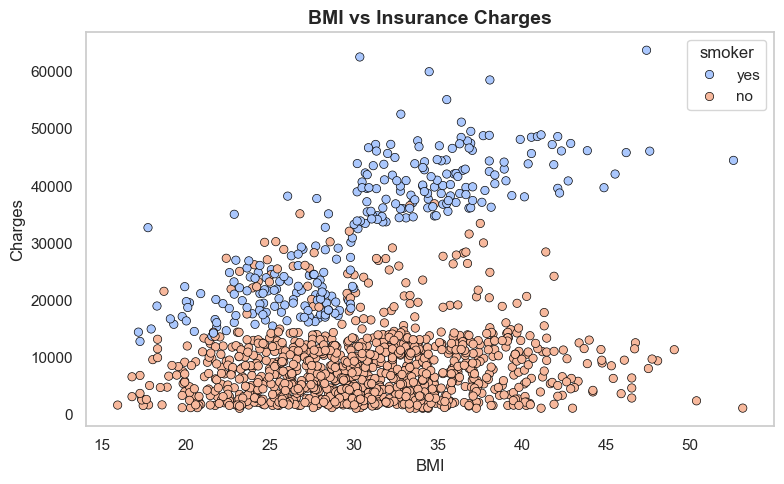

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='coolwarm', edgecolor='black')
plt.title('BMI vs Insurance Charges', fontsize=14, weight='bold')
plt.xlabel('BMI')
plt.grid(False)
plt.ylabel('Charges')
plt.tight_layout()
plt.show()


#### Plot of  Age vs Charges

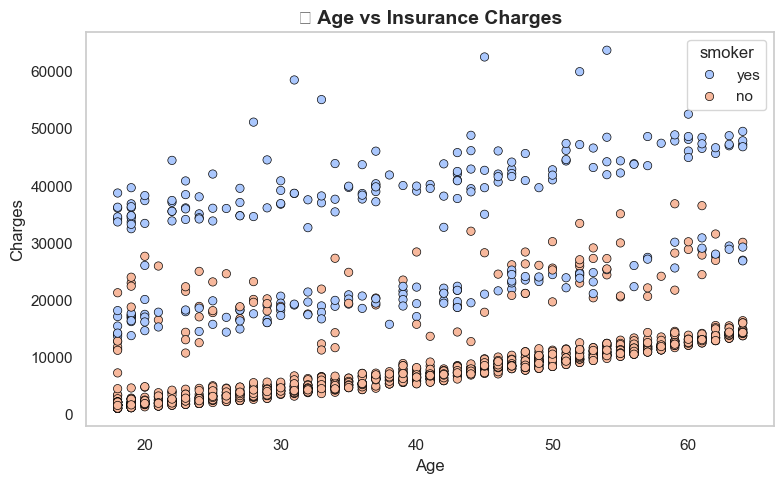

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='coolwarm', edgecolor='black')
plt.title('📈 Age vs Insurance Charges', fontsize=14, weight='bold')
plt.xlabel('Age')
plt.grid(False)
plt.ylabel('Charges')
plt.tight_layout()
plt.show()


#### Plot of Smoker vs Charges

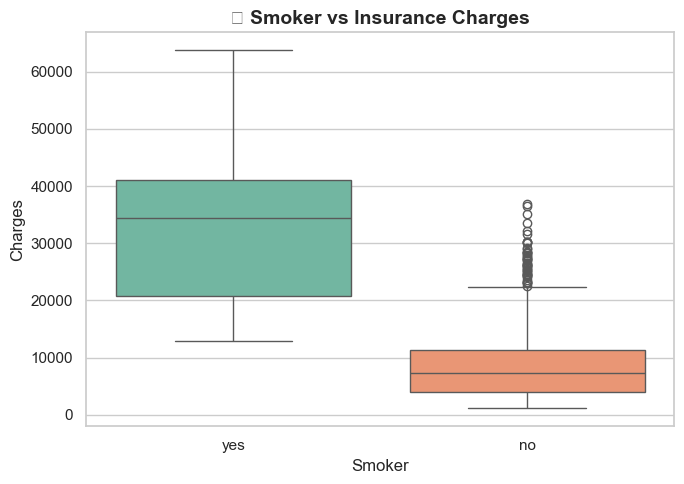

In [12]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
plt.title('🚬 Smoker vs Insurance Charges', fontsize=14, weight='bold')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()


#### Correlation Heatmap (Numerical Features)

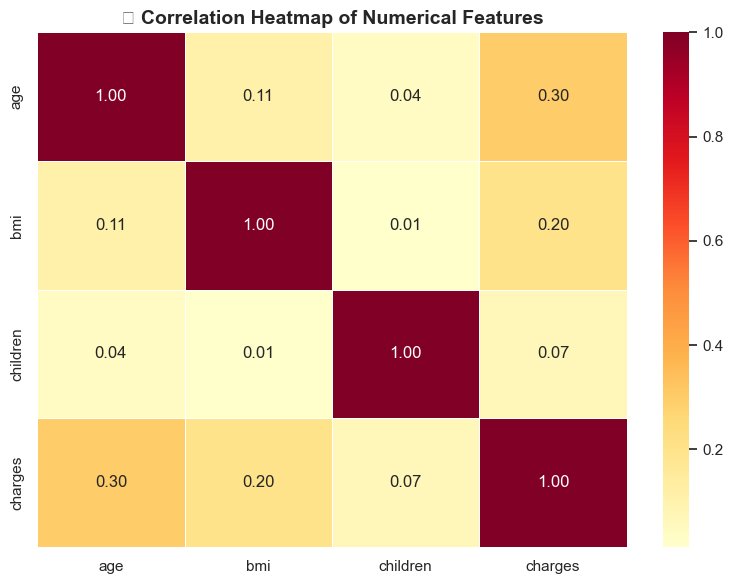

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title('📊 Correlation Heatmap of Numerical Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


#### Pairplot for Key Features

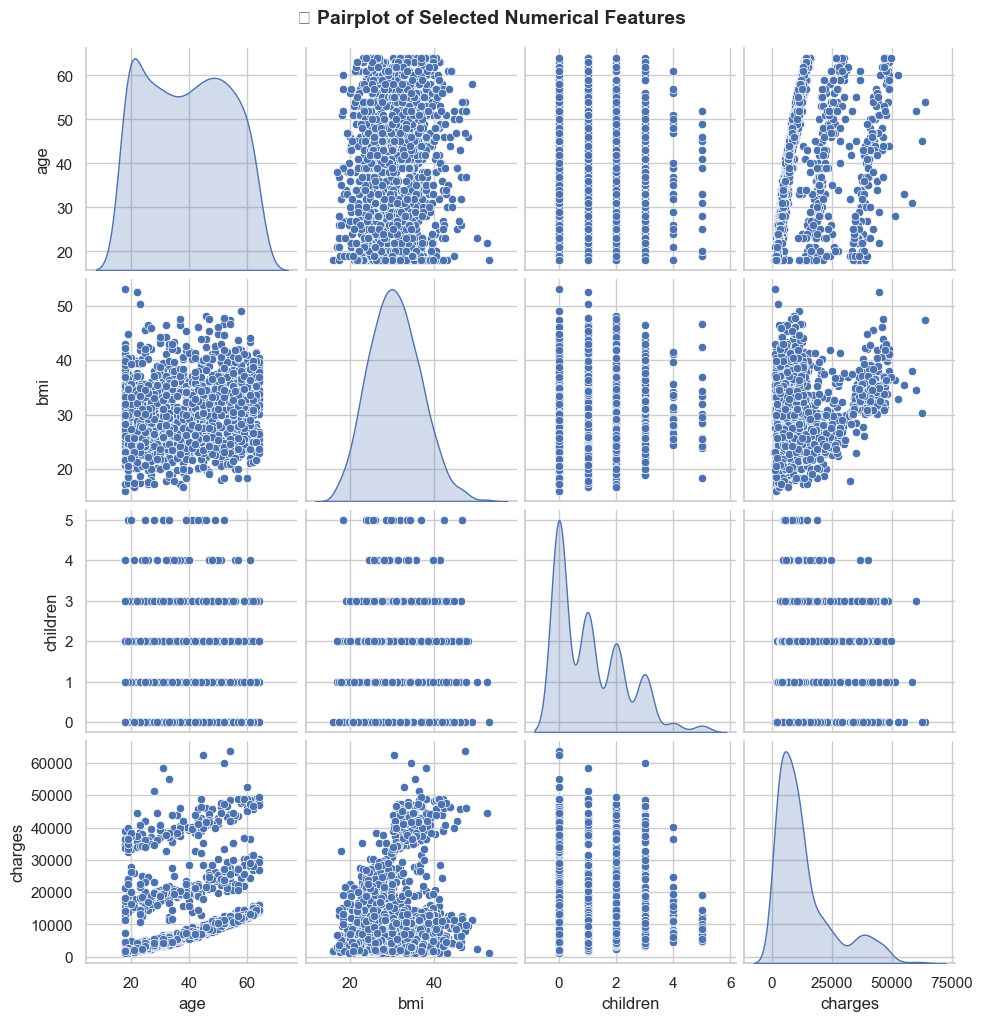

In [14]:
selected_cols = ['age', 'bmi', 'children', 'charges']
sns.pairplot(df[selected_cols], diag_kind='kde')
plt.suptitle('🔗 Pairplot of Selected Numerical Features', fontsize=14, weight='bold', y=1.02)
plt.show()


#### Charges by Region (Boxplot)

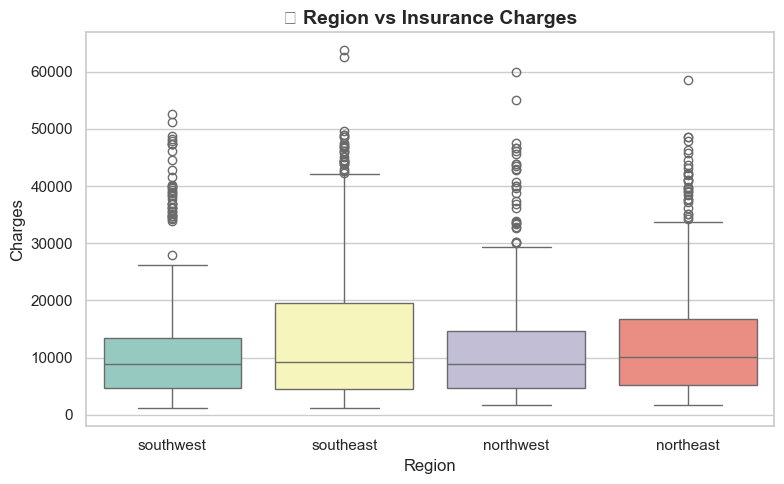

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='region', y='charges', palette='Set3')
plt.title('🌍 Region vs Insurance Charges', fontsize=14, weight='bold')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.tight_layout()
plt.show()


#### Countplot of Categorical Features

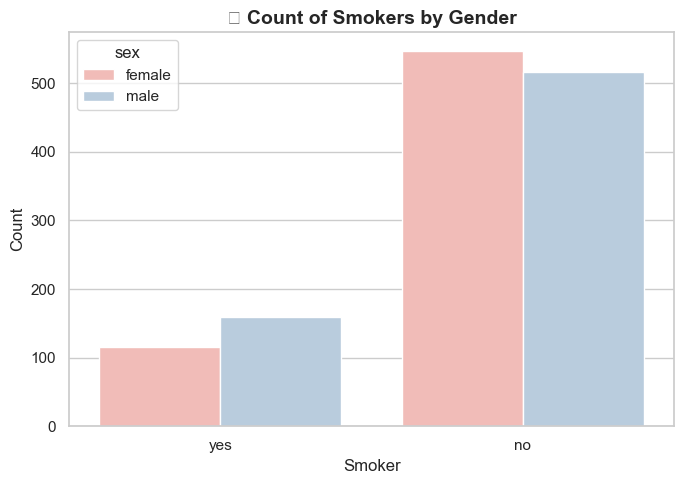

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='smoker', hue='sex', palette='Pastel1')
plt.title('👥 Count of Smokers by Gender', fontsize=14, weight='bold')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### Charges by Number of Children (Bar Plot)

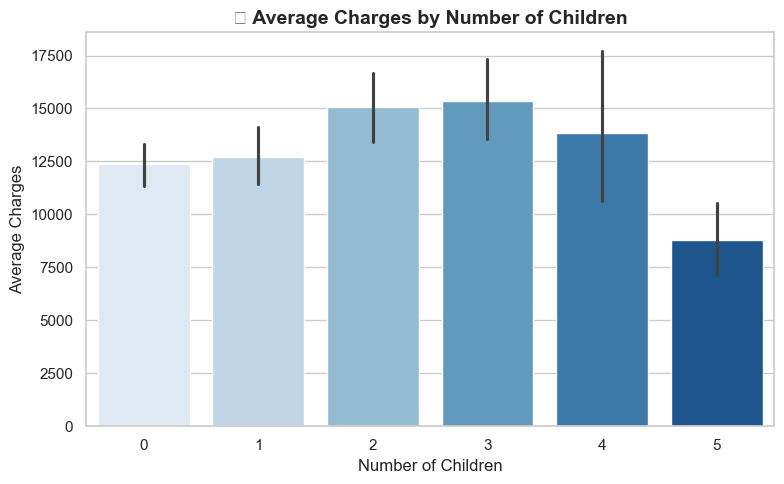

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='children', y='charges', palette='Blues')
plt.title('👶 Average Charges by Number of Children', fontsize=14, weight='bold')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.tight_layout()
plt.show()


## 5. Data Preprocessing

#### Cleaning the Data

In [18]:
df.duplicated().sum()

1

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Encode Categorical Features

In [21]:
# Columns to encode
cat_cols = ['sex', 'smoker', 'region']

# Apply Label Encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save for inverse transform later


In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


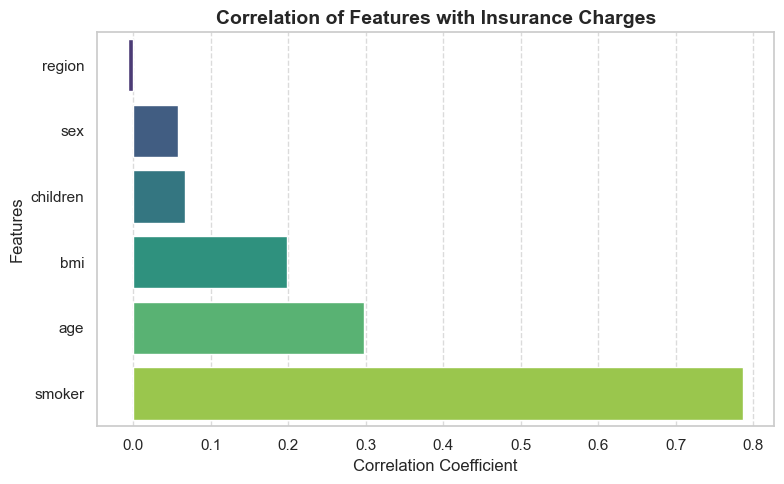

In [23]:
# Compute correlation with 'charges' and drop 'charges' itself
correlation = df.corr()['charges'].drop('charges').sort_values()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')

plt.title('Correlation of Features with Insurance Charges', fontsize=14, weight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
# Keep features with absolute correlation > 0.05
features = correlation[correlation.abs() > 0.05]
print(features)


sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
Name: charges, dtype: float64


## 6. Split the Dataset

In [25]:
# Step 1: Filter features with absolute correlation > 0.05
selected_features = correlation[correlation.abs() > 0.05].index.tolist()
# selected_features
# Step 2: Define X and y
X = df[selected_features]
y = df['charges']

 # Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Optional: Print shapes and selected features
print("Selected Features based on correlation:\n", selected_features)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Selected Features based on correlation:
 ['sex', 'children', 'bmi', 'age', 'smoker']
Training Shape: (1069, 5)
Testing Shape: (268, 5)


## 7. Model Training

In [26]:
# Initialize the model
model = LinearRegression( )

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

## 8. Model Evaluation

In [27]:
# Make predictions on the test set
y_pred=model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#  Print the results
print(" Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


 Model Evaluation Metrics:
MAE: 4198.11
MSE:  35901914.11
RMSE: 5991.82
R² Score: 0.8046


## 9. Conclusion & Insights

####  Model Performance

The Linear Regression model was trained to predict medical insurance charges based on personal and lifestyle features such as age, BMI, and smoking status.

**Evaluation Metrics on Test Set:**
- **MAE (Mean Absolute Error):** `4198.11`
- **MSE (Mean Squared Error):** `35,901,914.11`
- **RMSE (Root Mean Squared Error):** `5991.82`
- **R² Score:** `0.8046`

> The R² score of **0.80** indicates that the model explains approximately **80% of the variance** in the insurance charges, which is a solid result for a basic regression model.

---

#### Key Observations

- **Smoking Status:** Smokers are charged significantly higher premiums. This was the most influential factor in predicting charges.
- **Age:** Insurance charges increase with age, showing a clear positive correlation.
- **BMI:** High BMI values are linked to higher charges, especially for smokers.
- **Children:** The number of children had minimal influence on charges.

---
